1. Qual o número de imóveis por ano de construção?
2. Qual o menor número de quartos por ano de construção dos imóveis?
3. Qual o preço de compra mais alto por cada número de quartos?
4. Qual a soma de todos os preços de compra por cada número de quartos?
5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?
6. Qual o tamanho médio das salas dos imóveis por ano de construção?
7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?
10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [63]:
import numpy  as np
import pandas as pd
import seaborn as sns


pd.set_option('display.float_format', lambda x: '%.0f' % x) #suprimir a notação científica em Pandas

In [64]:
data = pd.read_csv('https://raw.githubusercontent.com/siquette/Analise-de-Dados-com-Python/main/m2/archive/kc_house_data.csv')

1. Qual o número de imóveis por ano de construção?

In [65]:
data["date"] = pd.to_datetime(data["date"])


In [66]:
data.groupby(data['date'].dt.year).size()

date
2014    14633
2015     6980
dtype: int64

2. Qual o menor número de quartos por ano de construção dos imóveis?

In [67]:
data.groupby([data['date'].dt.year, 'bedrooms']).size()

date  bedrooms
2014  0              9
      1            138
      2           1844
      3           6612
      4           4724
      5           1081
      6            176
      7             30
      8             11
      9              3
      10             3
      11             1
      33             1
2015  0              4
      1             61
      2            916
      3           3212
      4           2158
      5            520
      6             96
      7              8
      8              2
      9              3
dtype: int64

3. Qual o preço de compra mais alto por cada número de quartos?

In [68]:
data[['price', 'bedrooms']].groupby('bedrooms').max().reset_index()

,bedrooms,price
0,0,1295650
1,1,1247000
2,2,3278000
3,3,3800000
4,4,4489000
5,5,7062500
6,6,7700000
7,7,3200000
8,8,3300000
9,9,1400000


4. Qual a soma de todos os preços de compra por cada número de quartos?


In [83]:
data[['price', 'bedrooms']]. groupby('bedrooms').sum()

,price
bedrooms,
0,5323550
1,63210934
2,1107788602
3,4580263939
4,4372957028
5,1259346326
6,224541613
7,36145017
8,14366000


5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?

In [70]:
data['bathrooms'] = data['bathrooms'].astype(int)

In [79]:
data[['price', 'bedrooms', 'bathrooms']]. groupby(['bedrooms','bathrooms']).sum().reset_index()

,bedrooms,bathrooms,price
0,0,0,3907600
1,0,1,516000
2,0,2,899950
3,1,0,7872450
4,1,1,50831584
5,1,2,4506900
6,2,0,8897351
7,2,1,807539672
8,2,2,275503729
9,2,3,15847850


6. Qual o tamanho médio das salas dos imóveis por ano de construção?


In [72]:
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732
1901,1764
1902,1920
1903,1508
1904,1603
...,...
2011,2314
2012,2379
2013,2637


7. Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [73]:
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540
1901,1610
1902,1600
1903,1505
1904,1280
...,...
2011,2270
2012,2238
2013,2580


8 Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

In [74]:
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,733
1901,668
1902,879
1903,470
1904,1077
...,...
2011,805
2012,771
2013,883


9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?


In [88]:
from matplotlib import pyplot as plt

<BarContainer object of 2 artists>

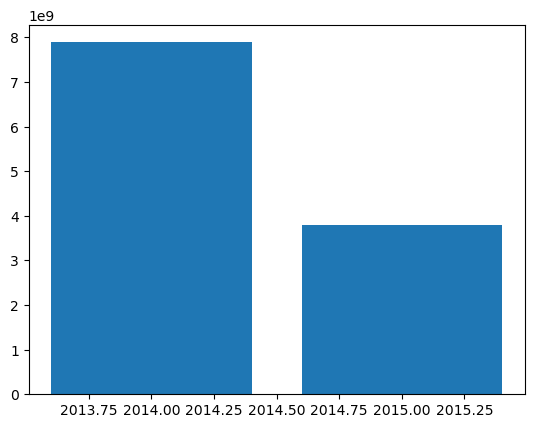

In [90]:
#eixo x: anos
#eixo y: soma dos precos


data['year']= pd.to_datetime(data['date']).dt.year

by_year = data[['price', 'year']].groupby('year').sum().reset_index()

plt.bar( by_year['year'], by_year['price'])





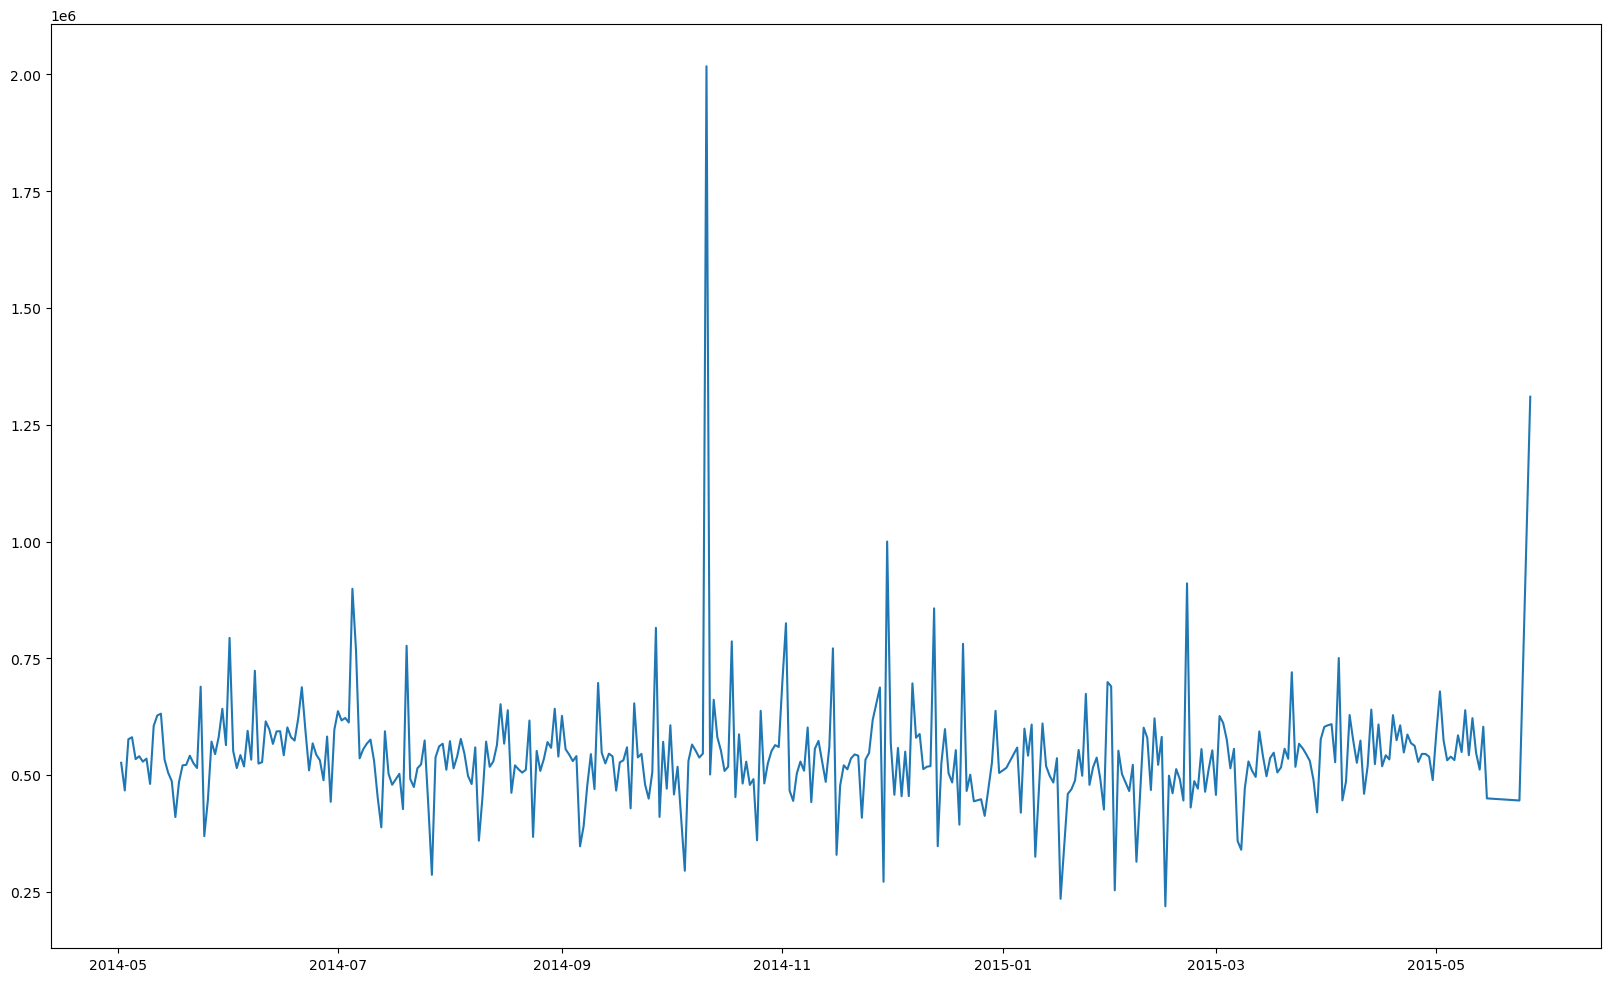

In [97]:
data['day']= pd.to_datetime(data['date'])

by_day = data[['price', 'day']].groupby('day').mean().reset_index()

plt.figure( figsize=(20,12))
plt.plot( by_day['day'], by_day['price'])



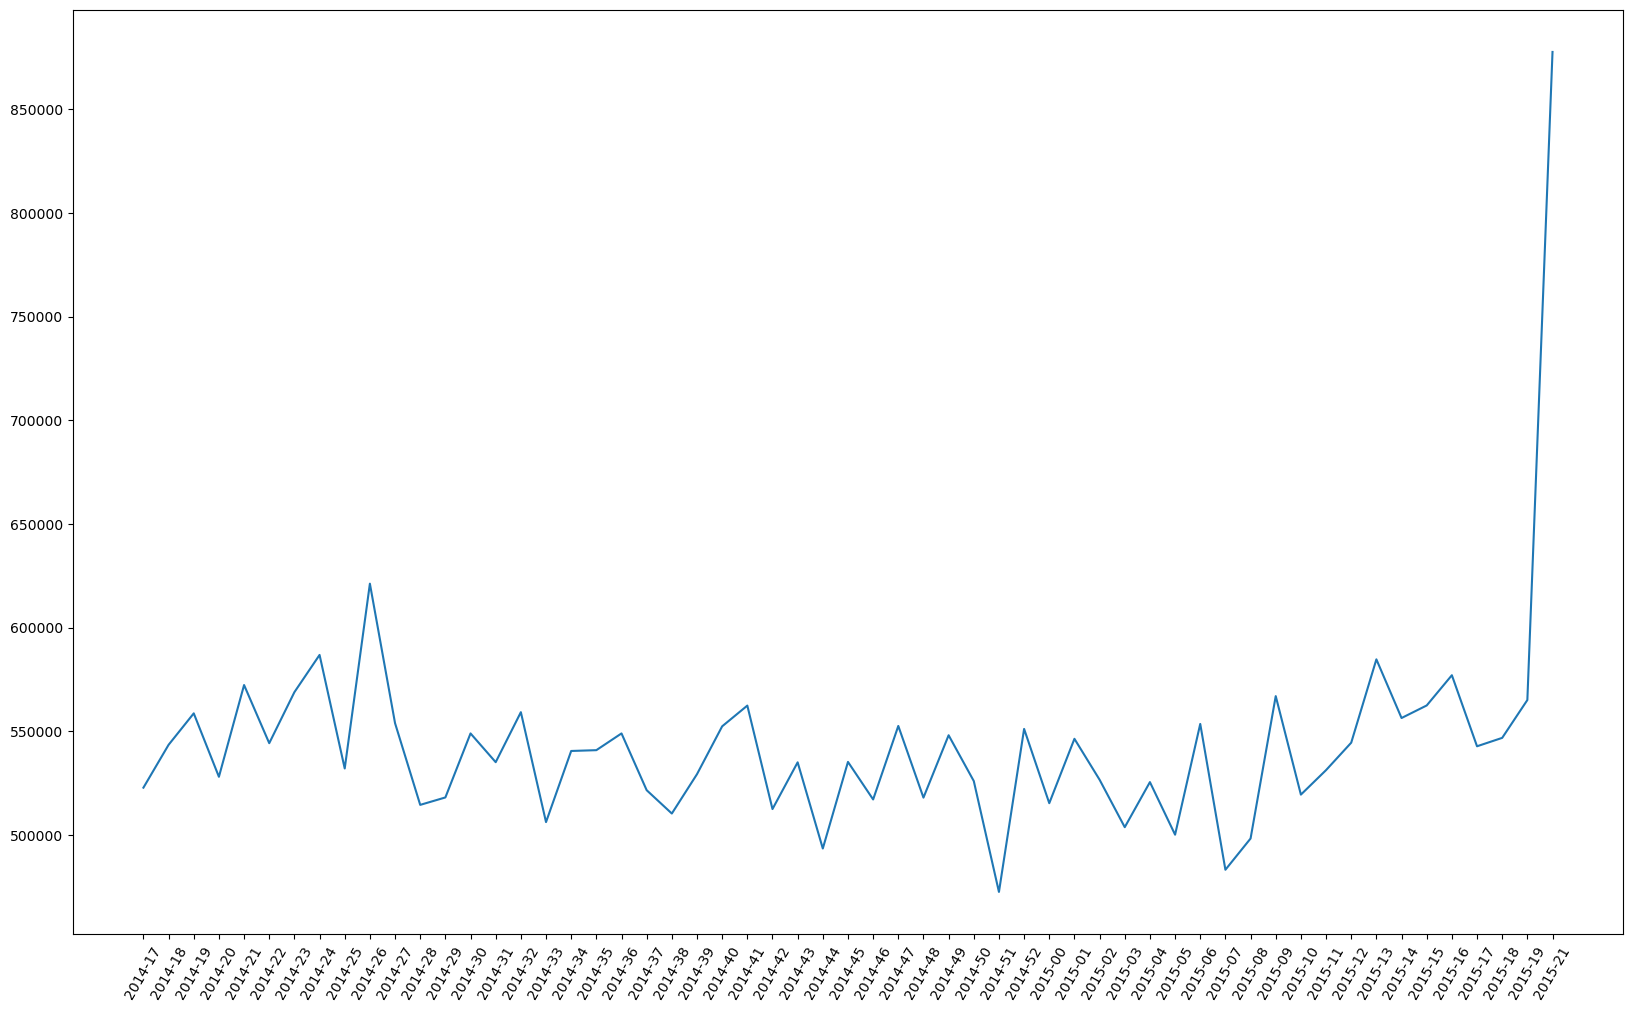

In [100]:
data['year_week']= pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

plt.figure( figsize=(20,12))
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

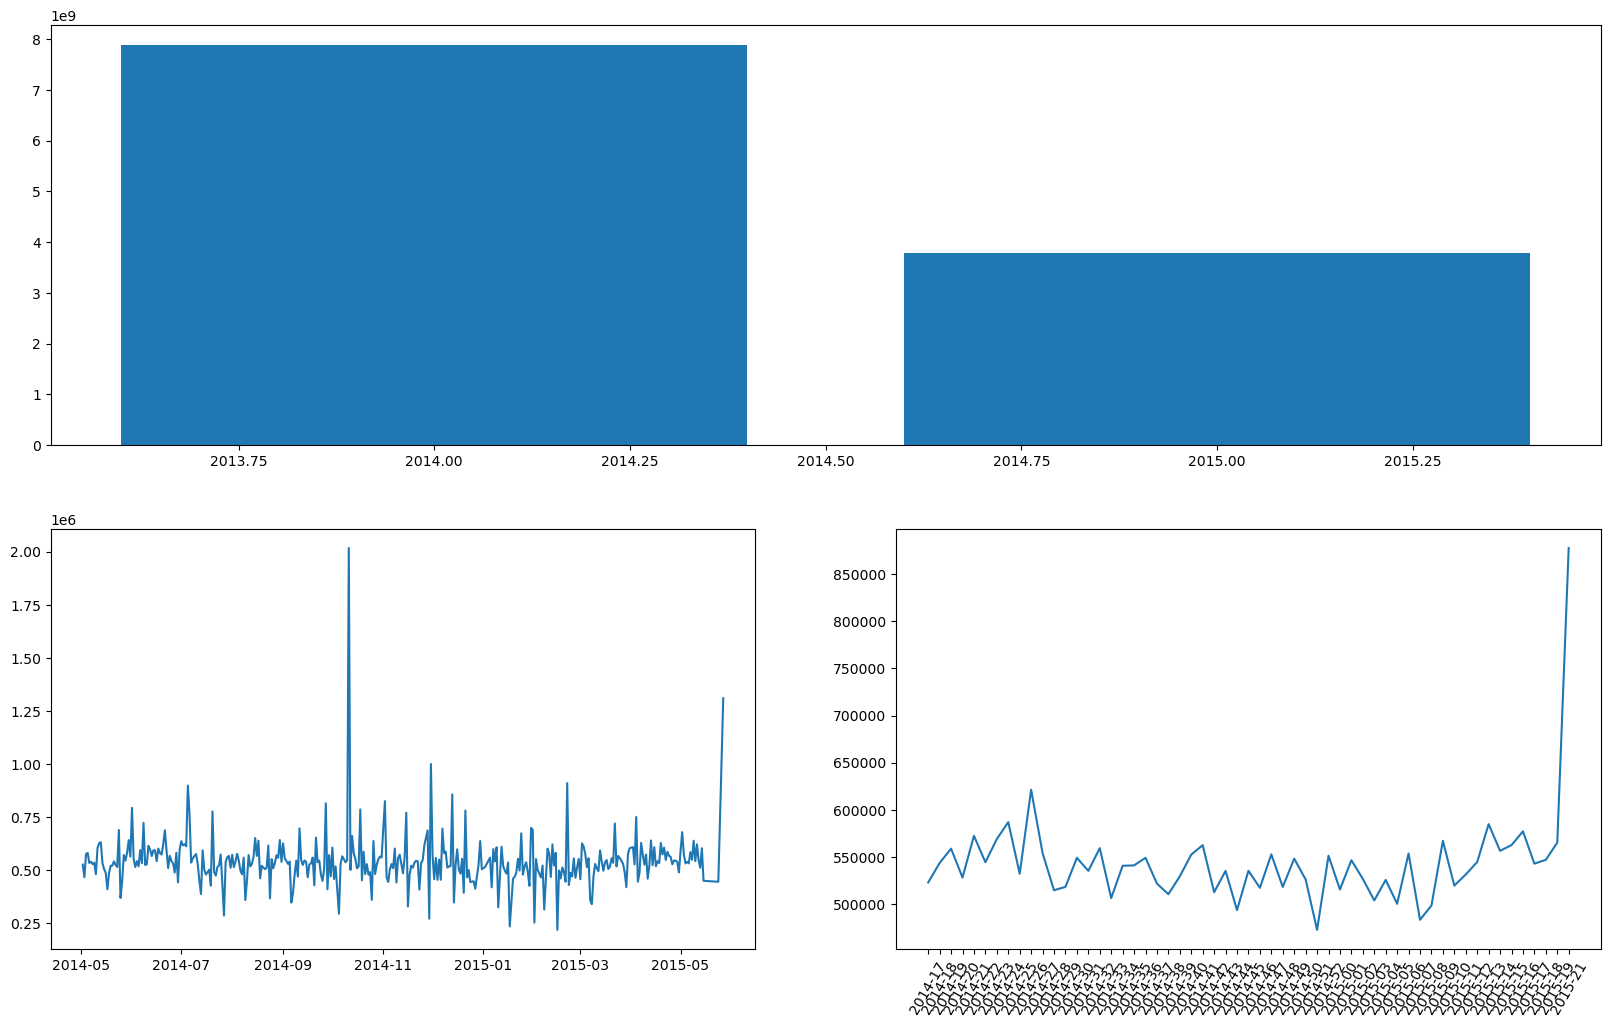

In [101]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[1,1])





data['year']= pd.to_datetime(data['date']).dt.year

by_year = data[['price', 'year']].groupby('year').sum().reset_index()

ax1.bar( by_year['year'], by_year['price'])


data['day']= pd.to_datetime(data['date'])

by_day = data[['price', 'day']].groupby('day').mean().reset_index()

ax2.plot( by_day['day'], by_day['price'])



data['year_week']= pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

ax3.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [104]:
import plotly.express as px

houses = data [['id','lat','long','price']]

fig = px.scatter_mapbox( houses, lat= 'lat', lon= 'long', size= 'price', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout( height=600, margin={'r': 0, 't': 0, 'l':0, 'b':0})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'price=%{marker.size}<br>lat=%{lat}<br>long=%{lon}<extra></extra>',
              'lat': array([47.5112, 47.721 , 47.7379, ..., 47.5944, 47.5345, 47.5941]),
              'legendgroup': '',
              'lon': array([-122.257, -122.319, -122.233, ..., -122.299, -122.069, -122.299]),
              'marker': {'color': '#636efa',
                         'size': array([221900., 538000., 180000., ..., 402101., 400000., 325000.]),
                         'sizemode': 'area',
                         'sizeref': 34222.22222222222},
              'mode': 'markers',
              'name': '',
              'showlegend': False,
              'subplot': 'mapbox',
              'type': 'scattermapbox'}],
    'layout': {'height': 600,
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'mapbox': {'center': {'lat': 47.56005251931708, 'lon': -122.21389640494147},
                          'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                          'style': 'open-street-map',
                          'zoom': 10},
               'margin': {'b': 0, 'l': 0, 'r': 0, 't': 0},
               'template': '...'}
})

mediana = np.median(data)
media = np.mean(data)
desv_pad = np.std(data)
variancia = np.var(data)

In [76]:
print(data.head(5))

           id       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13 221900         3          1         1180      5650   
1  6414100192 2014-12-09 538000         3          2         2570      7242   
2  5631500400 2015-02-25 180000         2          1          770     10000   
3  2487200875 2014-12-09 604000         4          3         1960      5000   
4  1954400510 2015-02-18 510000         3          2         1680      8080   

   floors  waterfront  view  ...  sqft_above  sqft_basement  yr_built  \
0       1           0     0  ...        1180              0      1955   
1       2           0     0  ...        2170            400      1951   
2       1           0     0  ...         770              0      1933   
3       1           0     0  ...        1050            910      1965   
4       1           0     0  ...        1680              0      1987   

   yr_renovated  zipcode  lat  long  sqft_living15  sqft_lot15  year  
0             0

In [77]:
print( data.dtypes)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
dtype: object
